<a href="https://colab.research.google.com/github/uurtsaikh201/gl-learning/blob/main/AIML_ML_Project_full_code_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [104]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

## Loading the dataset

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

from google.colab import drive
drive.mount('/content/drive')
loan_data = pd.read_csv("/content/drive/MyDrive/GL/loan/Loan_Modelling.csv")
data = loan_data.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

* Observations
* Sanity checks

In [106]:
print("\nFirst few rows:")
print(data.head())

print("\nData Info:")
data.info()

print("\nBasic Statistics:")
print(data.describe())

print("\n Missing Values:")
print(data.isnull().sum())

print("\n Duplicate Rows:", data.duplicated().sum())

print("\n Value Ranges for key columns:")
for col in ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']:
    print(f"\n{col}:")
    print(f"Min: {data[col].min()}")
    print(f"Max: {data[col].max()}")

print("\n Categorical Distributions:")
categorical_cols = ['Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
for col in categorical_cols:
    print(f"\n{col} distribution:")
    print(data[col].value_counts())

# Age vs Experience check
print("\n Age vs Experience check:")
print("Number of cases where Experience > Age:",
      len(data[data['Experience'] > data['Age']]))

# Mortgage vs Income ratio check
data['mortgage_income_ratio'] = data['Mortgage'] / data['Income']
print("\n Mortgage to Income ratio statistics:")
print(data['mortgage_income_ratio'].describe())

print("\n Target Variable Distribution:")
print(data['Personal_Loan'].value_counts(normalize=True))

# 7. Check ZIP Code distribution
print("Number of unique ZIP codes:", data['ZIPCode'].nunique())
print("\n Top 10 most common ZIP codes:")
print(data['ZIPCode'].value_counts().head(10))

# Additional checks for data quality
print("\n Additional Quality Checks:")

# Check for zero income
print("\n Customers with zero income:", len(data[data['Income'] == 0]))

# Check for invalid family size
print("Invalid family size (0 or >10):",
      len(data[(data['Family'] == 0) | (data['Family'] > 10)]))

# Check credit card spending vs income
print("\n Customers with CCAvg > Income:",
      len(data[data['CCAvg'] > data['Income']]))

# Clean up
del data['mortgage_income_ratio']


First few rows:
   ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

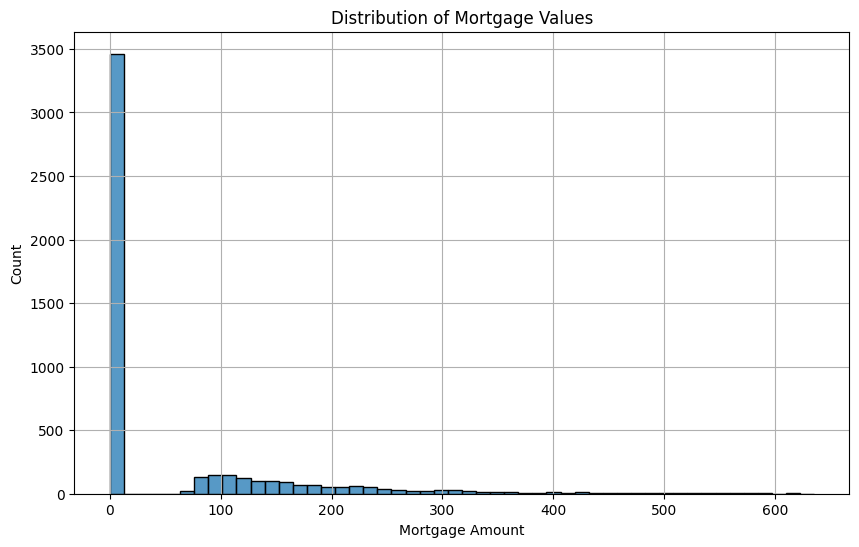

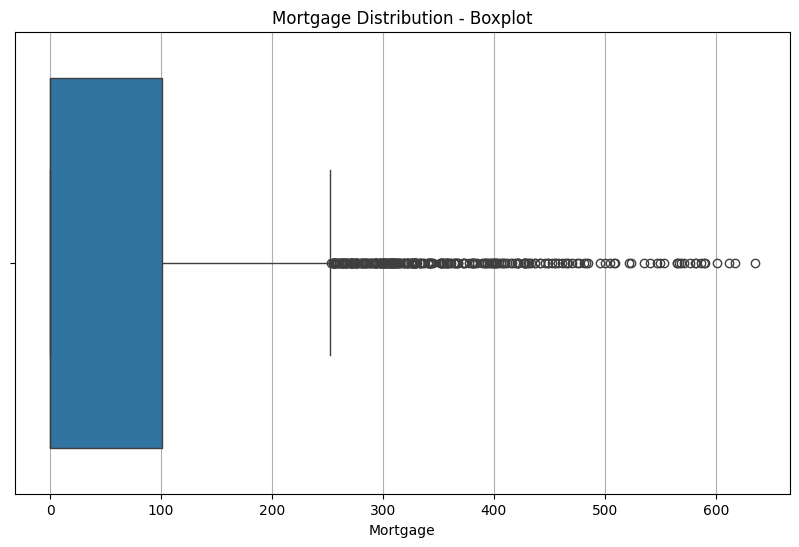


Mortgage Statistics:
count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64


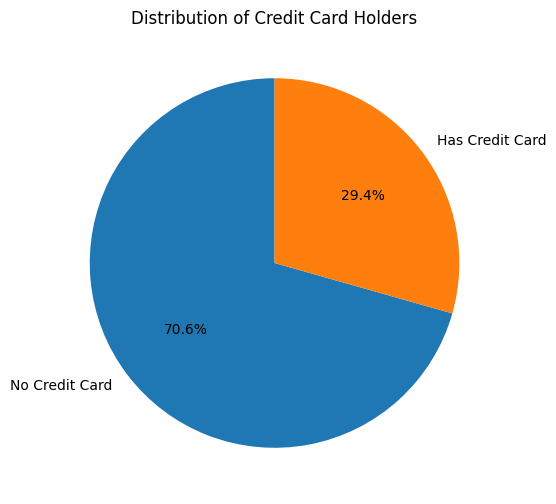


Credit Card Statistics:
Number of customers with credit cards: 1470
Percentage of customers with credit cards: 29.40%


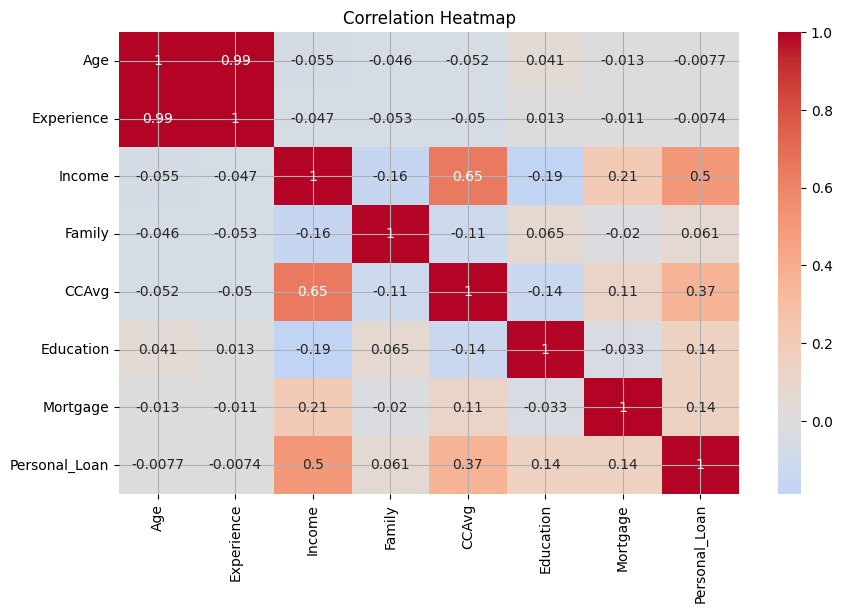


Correlations with Personal Loan:
Personal_Loan    1.000000
Income           0.502462
CCAvg            0.366889
Mortgage         0.142095
Education        0.136722
Family           0.061367
Experience      -0.007413
Age             -0.007726
Name: Personal_Loan, dtype: float64

Loan Distribution by Age Group:
Personal_Loan       0      1
Age_Group                   
<25            100.00   0.00
25-35           88.65  11.35
35-45           90.84   9.16
45-55           90.67   9.33
55-65           90.34   9.66
65+            100.00   0.00


<Figure size 1200x600 with 0 Axes>

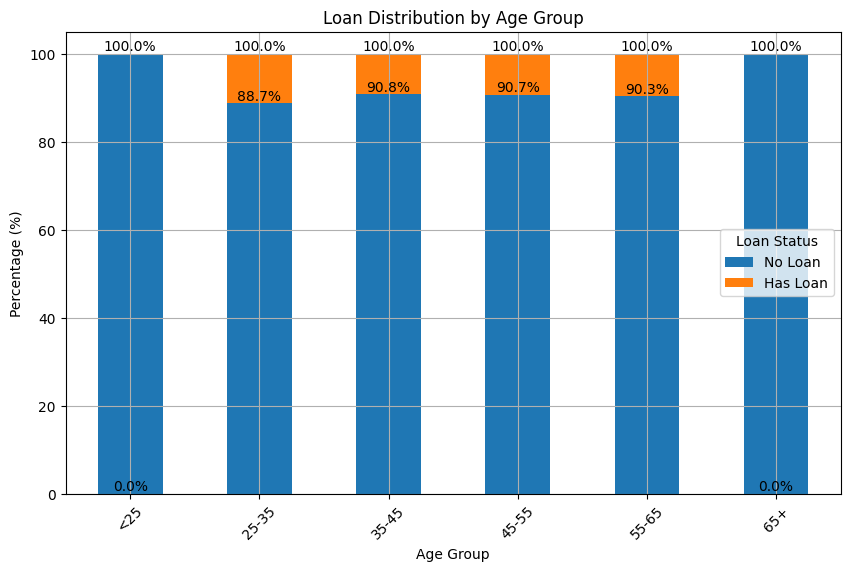

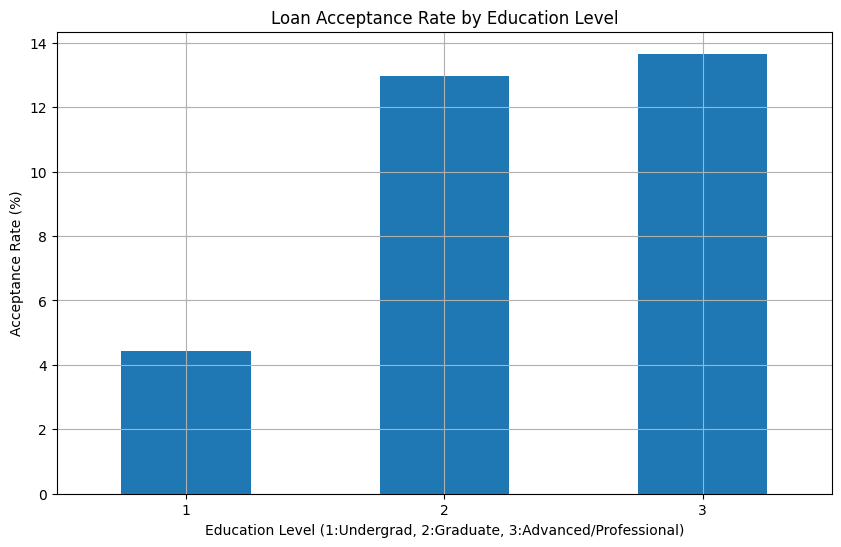


Loan Acceptance Rate by Education Level:
Education
1     4.44
2    12.97
3    13.66
Name: 1, dtype: float64

Summary Statistics by Education Level:
           Income  CCAvg  Mortgage  Personal_Loan
Education                                        
1           85.59   2.26     61.63           0.04
2           64.31   1.69     51.32           0.13
3           66.12   1.72     54.18           0.14


In [107]:
# Basic plot settings
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.grid'] = True

# 1. Analysis of Mortgage Distribution
plt.figure()
sns.histplot(data=data, x='Mortgage', bins=50)
plt.title('Distribution of Mortgage Values')
plt.xlabel('Mortgage Amount')
plt.ylabel('Count')

# Outliers using boxplot
plt.figure()
sns.boxplot(x=data['Mortgage'])
plt.title('Mortgage Distribution - Boxplot')
plt.show()

# Descriptive statistics
mortgage_stats = data['Mortgage'].describe()
print("\nMortgage Statistics:")
print(mortgage_stats)

# 2. Credit Card Analysis
credit_card_counts = data['CreditCard'].value_counts()
plt.figure()
plt.pie(credit_card_counts, labels=['No Credit Card', 'Has Credit Card'],
        autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Credit Card Holders')
plt.show()

print("\nCredit Card Statistics:")
print(f"Number of customers with credit cards: {credit_card_counts[1]}")
print(f"Percentage of customers with credit cards: {(credit_card_counts[1]/len(data))*100:.2f}%")

# 3. Correlation Analysis
# Calculate correlations with Personal_Loan
correlation_vars = ['Age', 'Experience', 'Income', 'Family', 'CCAvg',
                   'Education', 'Mortgage']
correlations = data[correlation_vars + ['Personal_Loan']].corr()['Personal_Loan'].sort_values(ascending=False)

# Create correlation heatmap
plt.figure()
sns.heatmap(data[correlation_vars + ['Personal_Loan']].corr(),
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

print("\nCorrelations with Personal Loan:")
print(correlations)

# 4. Age vs Loan Analysis
plt.figure(figsize=(12, 6))

# Create age groups
data['Age_Group'] = pd.cut(data['Age'],
                          bins=[0, 25, 35, 45, 55, 65, 100],
                          labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+'])

# Create cross-tabulation of Age_Group and Personal_Loan
age_loan_crosstab = pd.crosstab(data['Age_Group'], data['Personal_Loan'], normalize='index') * 100

# Create a stacked bar plot
ax = age_loan_crosstab.plot(kind='bar', stacked=True)
plt.title('Loan Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.legend(['No Loan', 'Has Loan'], title='Loan Status')
plt.xticks(rotation=45)

# Add percentage labels on the bars
for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%')

print("\nLoan Distribution by Age Group:")
print(age_loan_crosstab.round(2))

plt.show()

# 5. Education vs Loan Analysis
# Create a cross-tabulation of Education and Personal_Loan
education_loan = pd.crosstab(data['Education'], data['Personal_Loan'], normalize='index') * 100

plt.figure()
education_loan[1].plot(kind='bar')
plt.title('Loan Acceptance Rate by Education Level')
plt.xlabel('Education Level (1:Undergrad, 2:Graduate, 3:Advanced/Professional)')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=0)
plt.show()

# Print detailed statistics
print("\nLoan Acceptance Rate by Education Level:")
print(education_loan[1].round(2))

# Additional insights
print("\nSummary Statistics by Education Level:")
print(data.groupby('Education').agg({
    'Income': 'mean',
    'CCAvg': 'mean',
    'Mortgage': 'mean',
    'Personal_Loan': 'mean'
}).round(2))

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [109]:
data = loan_data.copy()
# 1. Missing Value Treatment
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# 2. Feature Engineering & Data Cleaning
# Fix Experience values (negative values don't make sense)
data['Experience'] = data['Experience'].apply(lambda x: 0 if x < 0 else x)

# Create age groups
data['Age_Group'] = pd.cut(data['Age'],
                          bins=[0, 25, 35, 45, 55, 100],
                          labels=['<25', '25-35', '35-45', '45-55', '55+'])

# Education level mapping (for better interpretability)
education_mapping = {1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'}
data['Education'] = data['Education'].map(education_mapping)

# 3. Outlier Detection and Treatment
# Function to detect and handle outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply outlier treatment to numerical columns
numerical_columns = ['Income', 'CCAvg', 'Mortgage']
for col in numerical_columns:
    data = handle_outliers(data, col)

# 4. Feature Scaling/Normalization
# Create a copy of the data for modeling
model_data = data.copy()

# One-hot encoding for categorical variables
model_data = pd.get_dummies(model_data, columns=['Education', 'Age_Group'])

# Standard scaling for numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns_to_scale = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
model_data[columns_to_scale] = scaler.fit_transform(model_data[columns_to_scale])

# 5. Preparing data for modeling
# Drop unnecessary columns
columns_to_drop = ['ID', 'ZIPCode']  # ZIP code might not be relevant for prediction
model_data = model_data.drop(columns=columns_to_drop)

# Split features and target
X = model_data.drop(['Personal_Loan', "Experience"], axis=1)
y = model_data['Personal_Loan']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Summary of preprocessing steps
print("\nPreprocessing Summary:")
print(f"Original shape: {data.shape}")
print(f"Processed shape: {model_data.shape}")
print("\nFeatures for modeling:", list(X.columns))

# Display correlation with target variable
correlations = X.corrwith(y).sort_values(ascending=False)
print("\n Top 5 features correlated with Personal_Loan:")
print(correlations.head())

Missing values in each column:
ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

Preprocessing Summary:
Original shape: (5000, 15)
Processed shape: (5000, 19)

Features for modeling: ['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_Advanced/Professional', 'Education_Graduate', 'Education_Undergrad', 'Age_Group_<25', 'Age_Group_25-35', 'Age_Group_35-45', 'Age_Group_45-55', 'Age_Group_55+']

 Top 5 features correlated with Personal_Loan:
Income                             0.504559
CCAvg                              0.383306
CD_Account                         0.316355
Mortgage                           0.092989
Education_Adv

## Model Building

### Model Evaluation Criterion

In [110]:
# defining a function to compute different metrics to check performance
def model_performance_classification_sk(model, predictors, target):
    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [111]:
def confusion_matrix_sk(model, predictors, target):
    """
    Plot confusion matrix with percentages
    """
    # Get predictions
    y_pred = model.predict(predictors)

    # Create confusion matrix
    cm = confusion_matrix(target, y_pred, labels=[0, 1])

    # Calculate percentages and create labels
    total = cm.sum()
    labels = []
    for item in cm.flatten():
        count = int(item)
        percentage = item / total
        labels.append(f"{count}\n{percentage:.2%}")
    labels = np.array(labels).reshape(2, 2)

    # Create plot
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


### Model Building

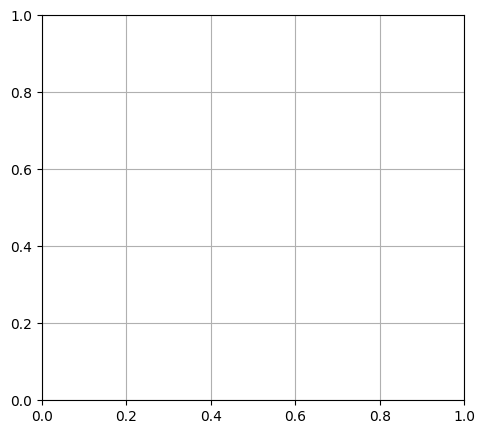

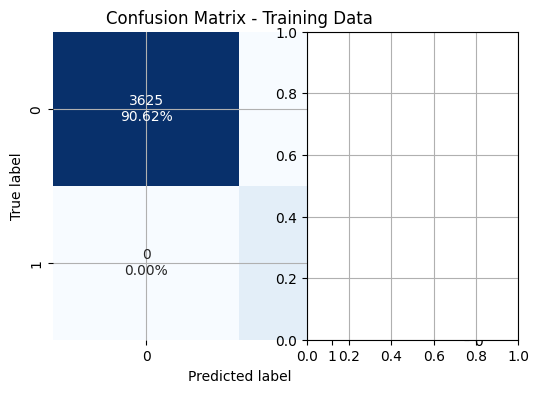

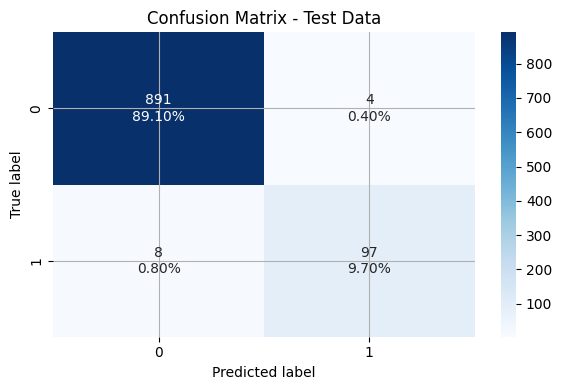


Training Performance:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Test Performance:
   Accuracy   Recall  Precision        F1
0     0.988  0.92381   0.960396  0.941748
['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_Advanced/Professional', 'Education_Graduate', 'Education_Undergrad', 'Age_Group_<25', 'Age_Group_25-35', 'Age_Group_35-45', 'Age_Group_45-55', 'Age_Group_55+']


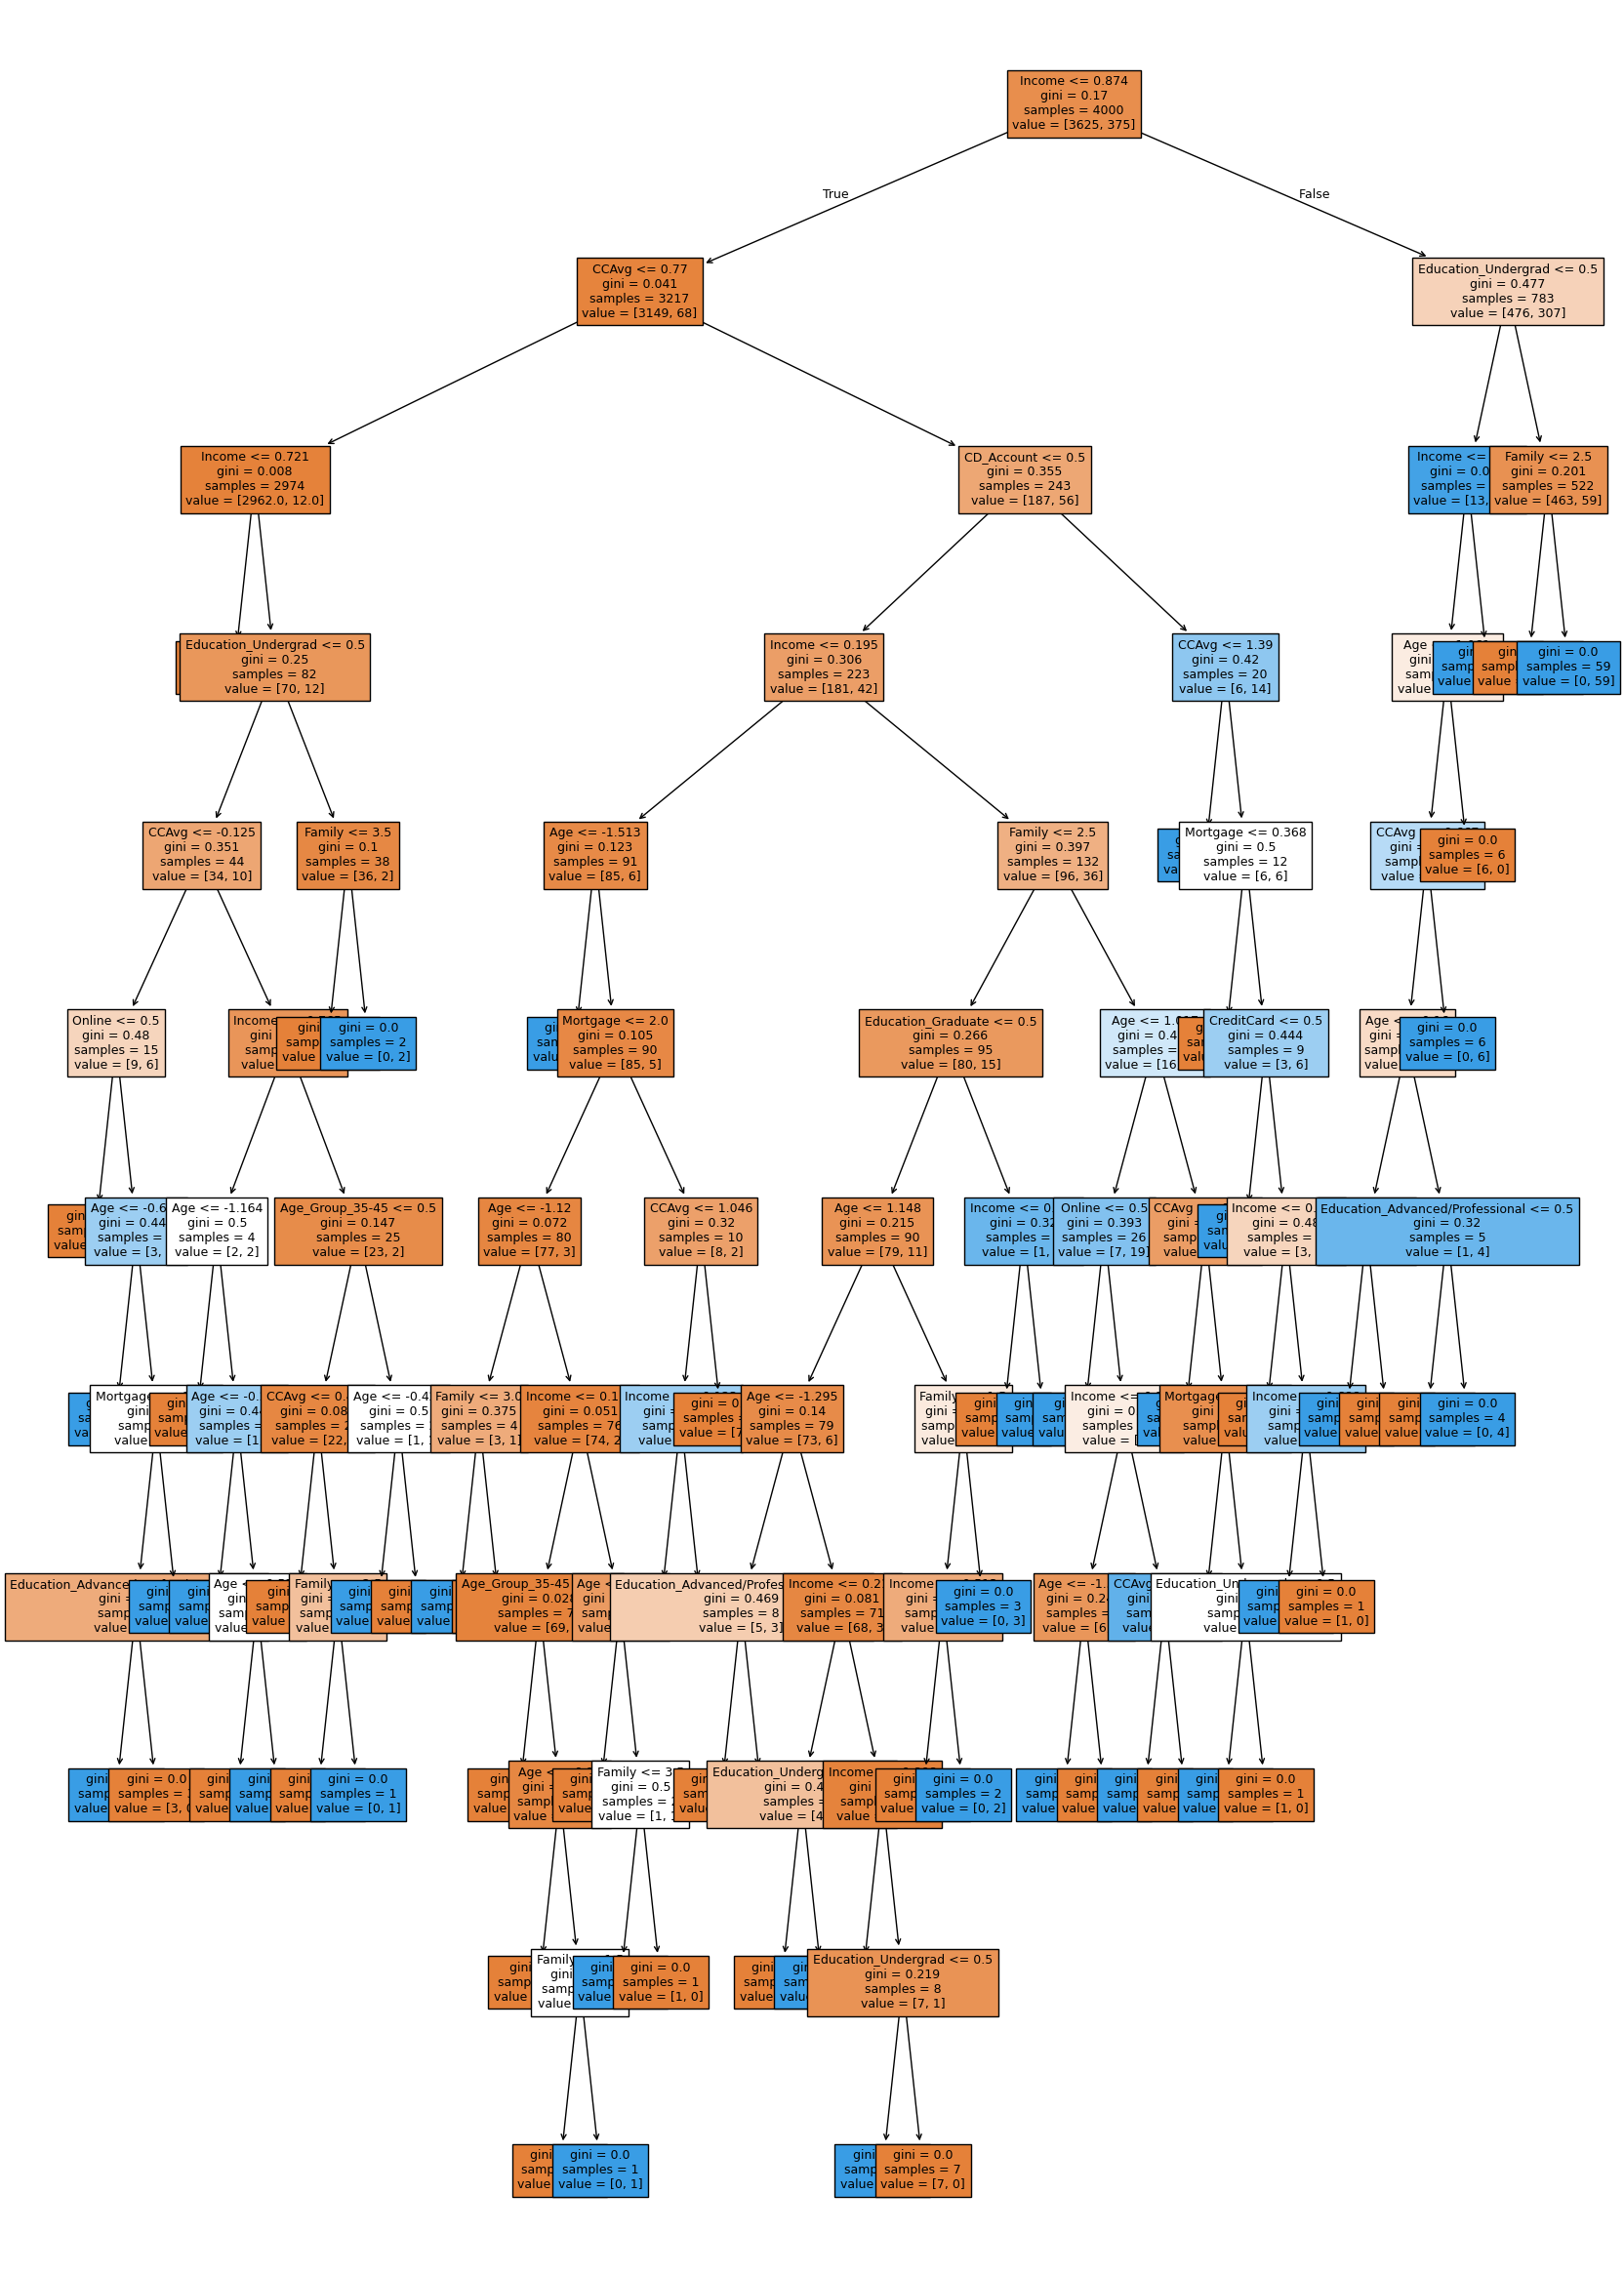

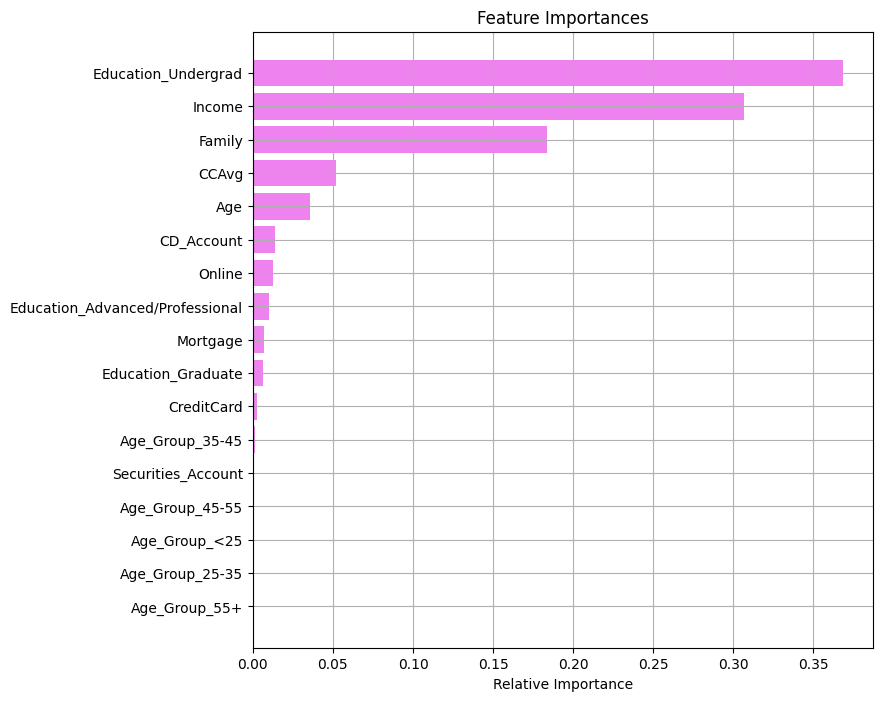

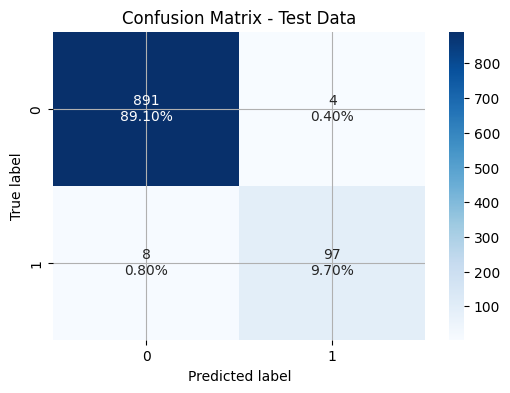

,Accuracy,Recall,Precision,F1
0,0.988,0.92381,0.960396,0.941748


In [112]:

# Train the model
model = DecisionTreeClassifier(criterion="gini", random_state=42)
model.fit(X_train, y_train)

# Plot confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
confusion_matrix_sk(model, X_train, y_train)
plt.title("Confusion Matrix - Training Data")

plt.subplot(1, 2, 2)
confusion_matrix_sk(model, X_test, y_test)
plt.title("Confusion Matrix - Test Data")

plt.tight_layout()
plt.show()

# Print performance metrics
print("\nTraining Performance:")
print(model_performance_classification_sk(model, X_train, y_train))
print("\nTest Performance:")
print(model_performance_classification_sk(model, X_test, y_test))

feature_names = list(X_train.columns)
print(feature_names)

plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

confusion_matrix_sk(model, X_test, y_test)
plt.title("Confusion Matrix - Test Data")
plt.show()

# Get performance metrics for test data
decision_tree_perf_test = model_performance_classification_sk(model, X_test, y_test)
decision_tree_perf_test

## Model Performance Improvement

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


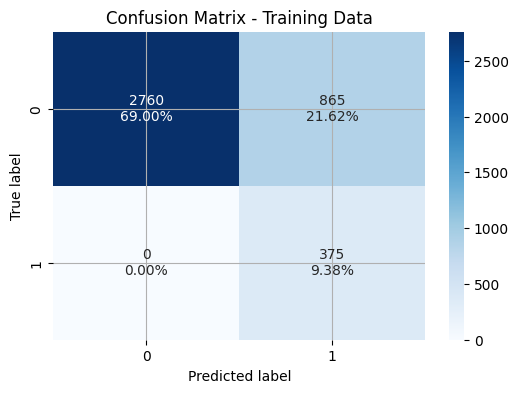

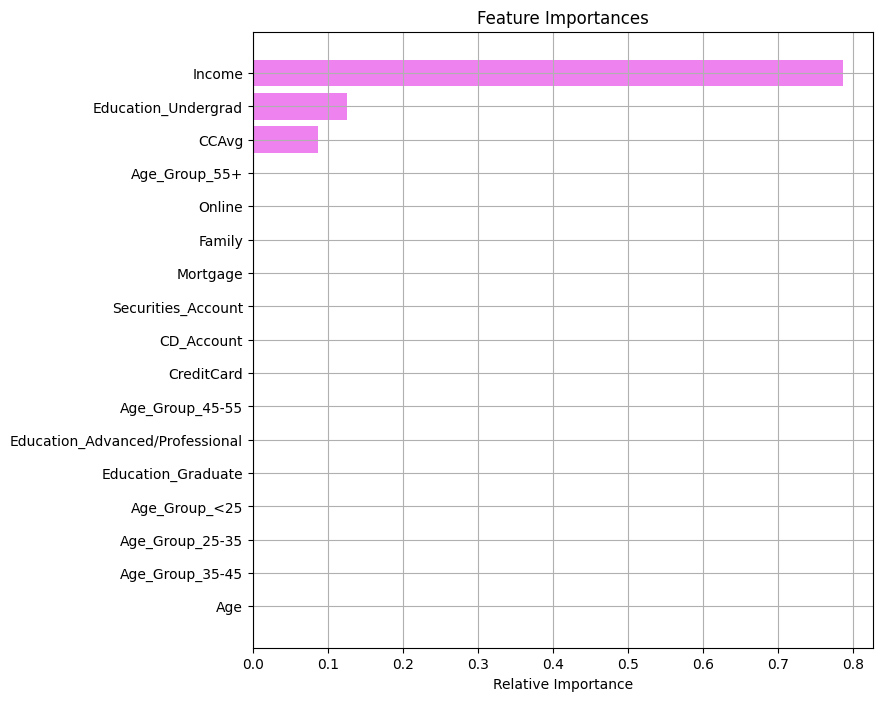

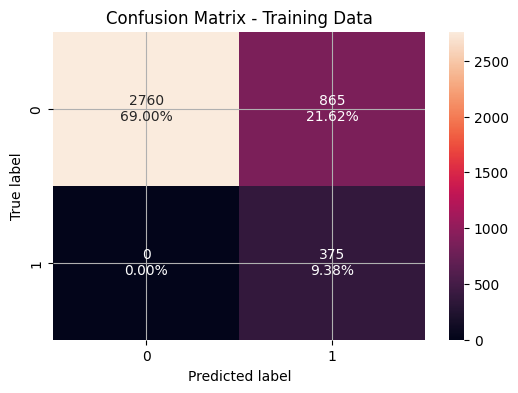

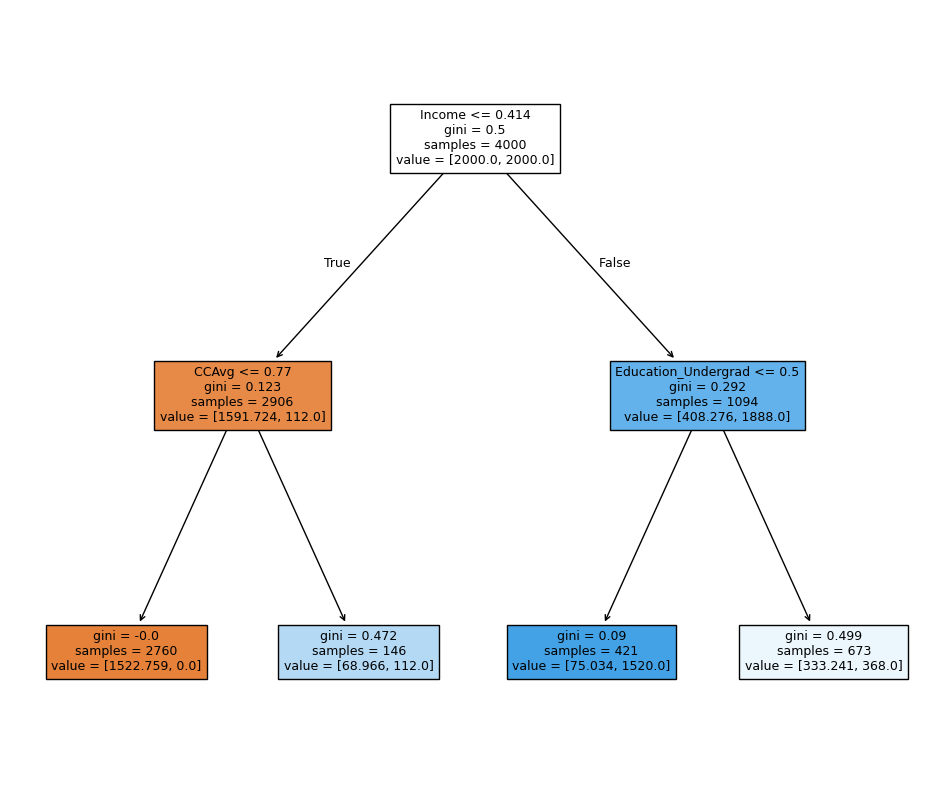

Training Performance:
   Accuracy  Recall  Precision        F1
0   0.78375     1.0   0.302419  0.464396


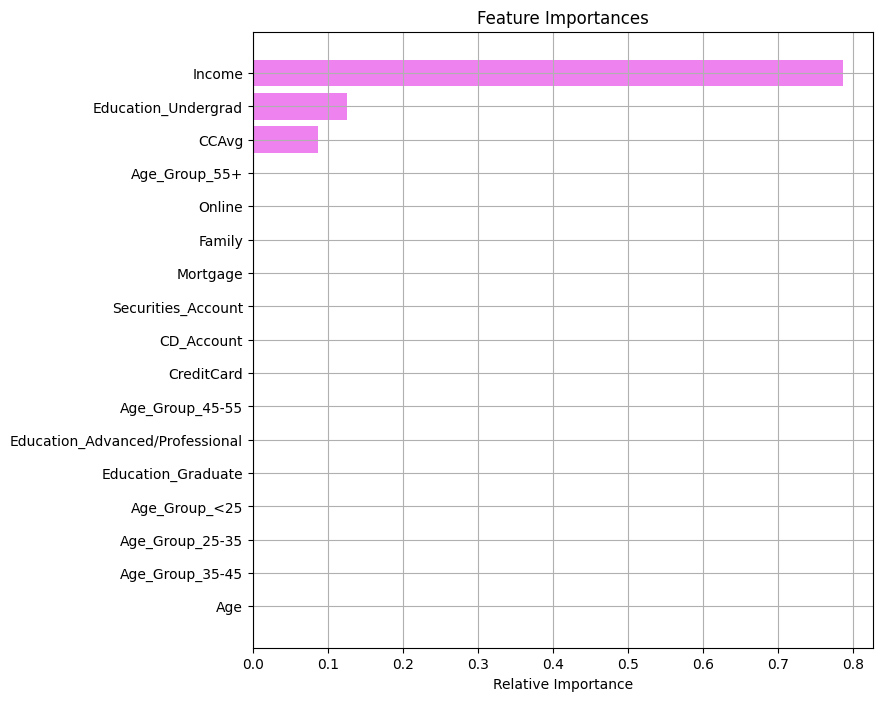

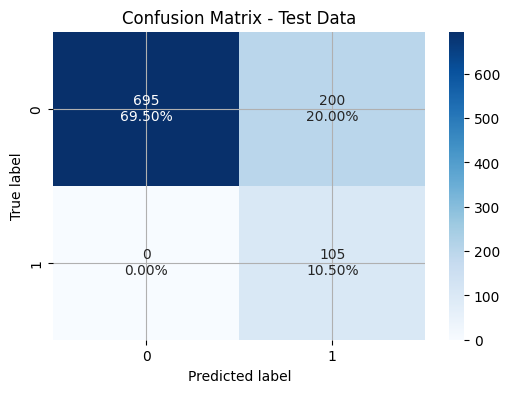

Test Performance:
   Accuracy  Recall  Precision        F1
0       0.8     1.0   0.344262  0.512195


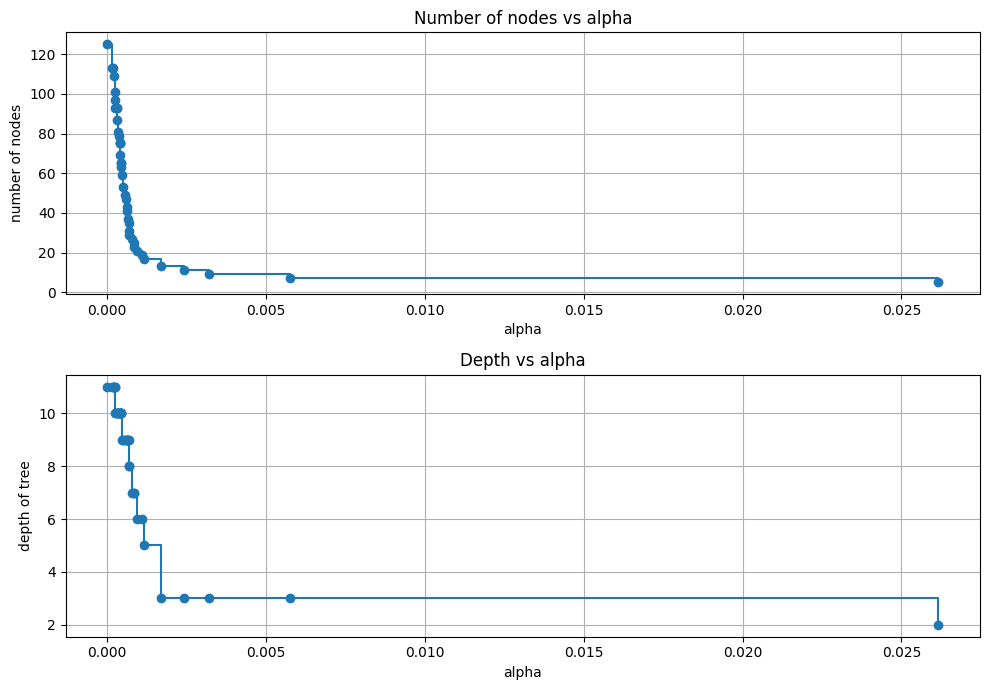

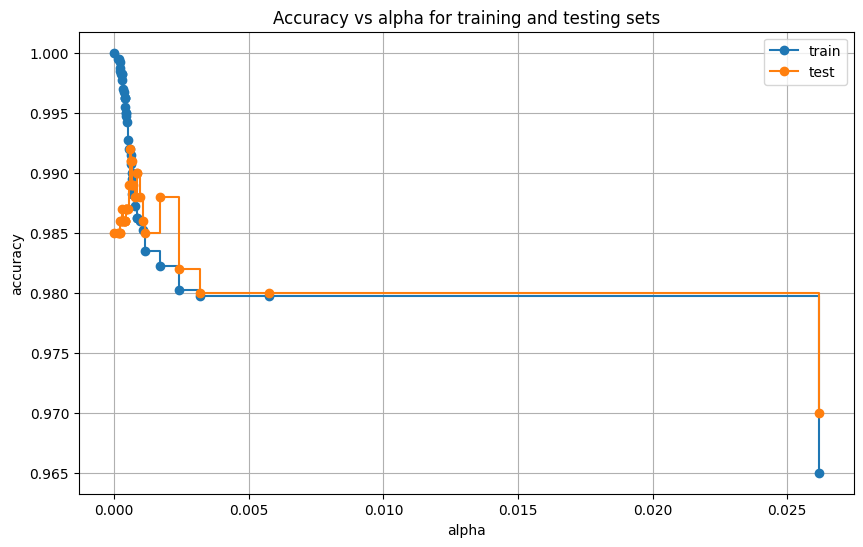

Best alpha: 0.0006000000000000003


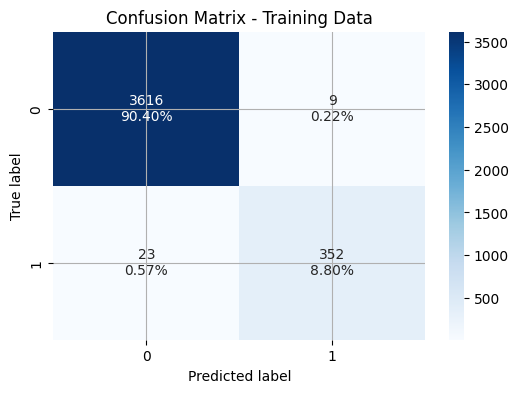

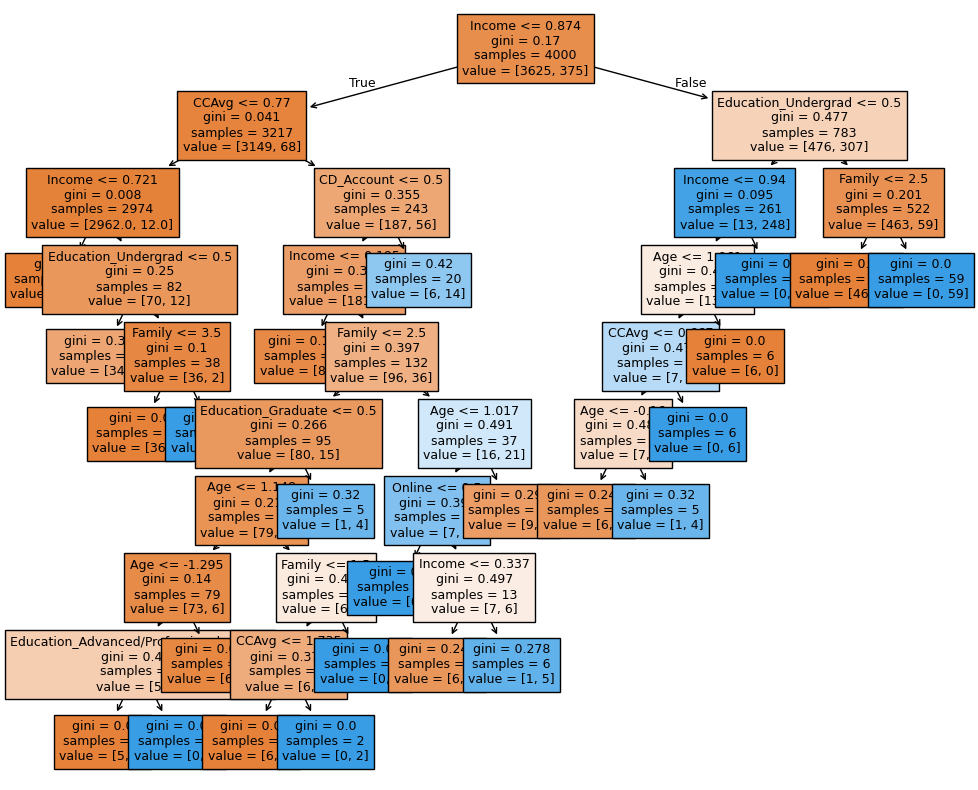

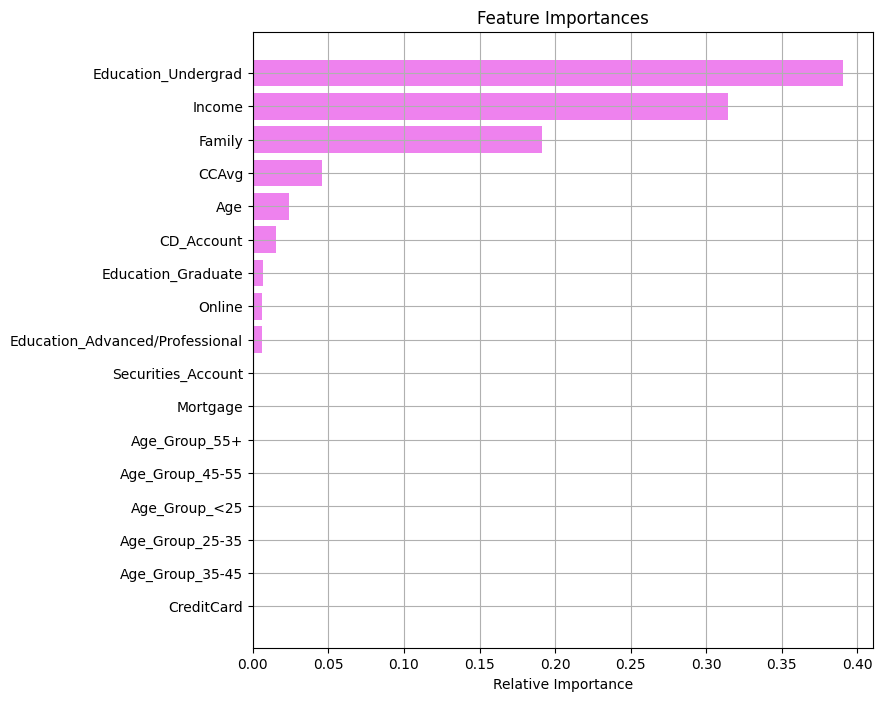

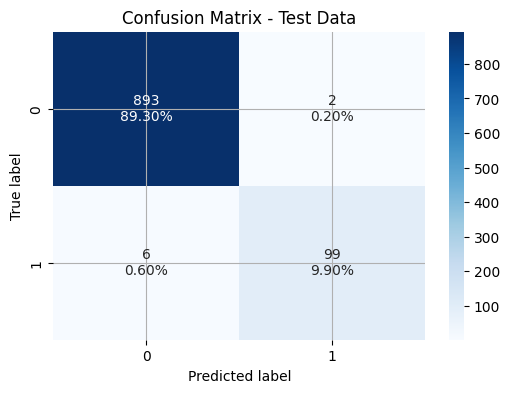

,Accuracy,Recall,Precision,F1
0,0.992,0.942857,0.980198,0.961165


In [113]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

estimator = best_estimator
estimator.fit(X_train, y_train)

confusion_matrix_sk(estimator, X_train, y_train)
plt.title("Confusion Matrix - Training Data")
plt.show()

decision_tree_tune_perf_train = model_performance_classification_sk(estimator, X_train, y_train)
decision_tree_tune_perf_train

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# post-prunning
estimator = best_estimator
estimator.fit(X_train, y_train)
confusion_matrix_sklearn(estimator, X_train, y_train)
plt.title("Confusion Matrix - Training Data")
plt.show()

decision_tree_tune_post_train = model_performance_classification_sk(estimator, X_train, y_train)
plt.figure(figsize=(12, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

print("Training Performance:")
print(decision_tree_tune_post_train)

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# check performance of test data
confusion_matrix_sk(estimator, X_test, y_test)
plt.title("Confusion Matrix - Test Data")
plt.show()

decision_tree_tune_post_test = model_performance_classification_sk(estimator, X_test, y_test)
# post-prunning

print("Test Performance:")
print(decision_tree_tune_post_test)
clf = DecisionTreeClassifier(criterion="gini", random_state=42)
clf.fit(X_train, y_train)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
pd.DataFrame(ccp_alphas)

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


# Recall vs alpha for training and testing sets

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

index_best_alpha = np.argmax(test_scores)
best_alpha = ccp_alphas[index_best_alpha]
print("Best alpha:", best_alpha)

estimator_new = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
estimator_new.fit(X_train, y_train)
confusion_matrix_sk(estimator_new, X_train, y_train)
plt.title("Confusion Matrix - Training Data")
plt.show()

# check performance on training data
decision_tree_tune_post_train = model_performance_classification_sk(estimator_new, X_train, y_train)
decision_tree_tune_post_train

plt.figure(figsize=(12, 10))
out = tree.plot_tree(
    estimator_new,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

# importance
importances = estimator_new.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# check performance on test data
confusion_matrix_sk(estimator_new, X_test, y_test)
plt.title("Confusion Matrix - Test Data")
plt.show()

# decision tree test
decision_tree_tune_post_test = model_performance_classification_sk(estimator_new, X_test, y_test)
decision_tree_tune_post_test

## Model Performance Comparison and Final Model Selection

In [114]:
# Compare training performance of all models
models_train_performance = pd.concat(
    [decision_tree_perf_train, decision_tree_tune_perf_train, decision_tree_tune_post_train],
    axis=1
)

# Rename the columns using proper indexing
models_train_performance.columns = pd.MultiIndex.from_product([
    ['Decision Tree', 'Decision Tree Tuned', 'Decision Tree Tuned Post'],
    ['Accuracy', 'Recall', 'Precision', 'F1']
])

print('Training Performance Comparison:')
print(models_train_performance)

Training Performance Comparison:
  Decision Tree                       Decision Tree Tuned                   \
       Accuracy Recall Precision   F1            Accuracy Recall Precision   
0           1.0    1.0       1.0  1.0             0.78375    1.0  0.302419   

            Decision Tree Tuned Post                                
         F1                 Accuracy    Recall Precision        F1  
0  0.464396                    0.992  0.938667  0.975069  0.956522  


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___